# 머신러닝 실습 예제

## 군집(Clustering) : K-means 알고리즘

### # 군집(Clustring)
- 주어진 데이터 집합을 유사한 특성(관계, 특성)을 갖는 데이터들의 그룹으로 나누는 것을 군집화(clustering)라 하고 이렇게 나누어진 유사한 데이터의 그룹을 군집(cluster)이라 한다.
- 대표적인 비지도학습 방법 

#### ## 군집화 방법
- **K-평균 군집화(K-means Clustering)**
- 디비스캔 군집화(DBSCAN Clustering)
- 유사도 전파 군집화(Affinity Propagation Clustering)
- 계층적 군집화(Hierarchical Clustering)
- 스펙트럴 군집화(Spectral Clustering
<br><br>
- 사이킷런 군집 클래스 : 
https://scikit-learn.org/stable/modules/classes.html?highlight=sklearn%20cluster#module-sklearn.cluster

#### ## 성능평가 방법
(다른 방법과 다르게 비교적)성능기준을 만들기 어렵다.<br>
- 조정 랜드지수(ARI: Adjusted Rand Index):<br>
랜드지수(Rand Index, RI)는 가능한 모든 데이터 쌍의 개수에 대해 정답인 데이터 쌍의 개수의 비율로 정의하는 방식으로 무작위 군집화에서 생기는 랜드지수의 기댓값을 원래의 값에서 빼서 기댓값과 분산을 재조정한 것
- 조정 상호정보량(AMI:Adjusted Mutual Information):<br>
두 확률변수간의 상호 의존성을 측정한 값
- **실루엣계수(Silhouette Coefficient)**:<br>
모든 데이터 쌍 (i,j)에 대해 거리 혹은 비유사도(dissimilarity)을 구한 값

### # K-means
- 데이터를 K개의 군집(Cluster)으로 묶는(Clusting) 알고리즘
- 군집에 배정할 때 각 군집의 중심점(Centroid)과 데이터들의 평균(mean) 유클리드 거리를 계산하여 가장 가까운 군집에 배정하는 방법
- 사이킷런 K-means :
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

-----------------

### [실습] 고객 세분화(Customer Segmentation)

### 1. 목표 설정

**타겟 마케팅을 위한 소비자 군집 만들기**
- 타겟 마케팅 : 구매 행동을 가진 그룹을 세분화하여 각 특성에 맞는 마케팅을 하는 전략 
- 머신러닝 군집(Clustering) 분석 : K-평균 알고리즘 사용, 비지도학습
- 기존 고객 정보를 **머신러닝의 군집 분석** 학습을 통해 훈련시켜 모델을 만들어 유사한 특성(관계, 특성)을 갖는 데이터를 클러스터로 구성한다. 이를 통해 새로운 데이터의 특성을 분석하여 해당하는 클러스터를 **예측**한다.

### 2. 데이터 수집

#### UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/index.php)
- **검색키워드**: online retail (https://archive.ics.uci.edu/ml/datasets/online+retail)
- **다운로드** : Online Retail.xlsx 다운로드--> data 폴더로 이동(파일명 공백없도록 수정) 
- **데이터셋** : 영국 온라인 소매 플랫폼에서 2010-12-01 ~ 2011-12-09까지 발생한 541,909건의 실제 거래 데이터 

In [1]:
import pandas as pd
import numpy as np

# 데이터량이 많아서 로딩하는데 시간이 좀 걸린다.
df = pd.read_excel('data/OnlineRetail.xlsx') # 파일명에 공백이 없도록 수정하면 좋다.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
print(f"총기간: {df['InvoiceDate'].min()} ~ {df['InvoiceDate'].max()}")
print(f"날짜수: {df['InvoiceDate'].max() - df['InvoiceDate'].min()}" )

총기간: 2010-12-01 08:26:00 ~ 2011-12-09 12:50:00
날짜수: 373 days 04:24:00


#### 컬럼정보
- InvoiceNo : 송장번호 'C'로 시작하는 취소 주문
- StockCode : 제품 고유 품목코드
- Description : 제품 설명
- Quantity : 주문 수량
- InvoiceDate : 주문 날짜와 시간
- UnitPrice : 제품 단가 (영국 파운드화)
- CustomerID : 주문 고객 번호
- Country : 주문 고객의 국적

#### 데이터 요약정보

In [3]:
df.info() # 데이터의 건수, 컬럼, 데이터타입,  Null값과 같은 결측치가 있는지 확인 등

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.describe()   # 기술통계 정보

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


-------------------

### 3. 데이터 전처리

#### 3-1. 데이터 정제하기
 1. 중복 데이터 제거
 2. Quantity 과 UnitPrice 음수인 값 제거
 3. CustomerID 값 없는 데이터 삭제
 4. CustomerID float64 --> int형으로 변환	

#### 3-1-1.중복 데이터 제거

In [5]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(541909, 8)
(536641, 8)


#### 3-1-2.Quantity 과 UnitPrice 음수인 값 제거

In [6]:
df = df[ df['Quantity'] > 0 ]
df = df[ df['UnitPrice'] > 0 ]
print(df.shape)

(524878, 8)


#### 3-1-3.CustomerID 값 없는 데이터 삭제

In [7]:
df = df[ df['CustomerID'].notnull() ]
print(df.shape)

(392692, 8)


#### 3-1-4.CustomerID float64 --> int형으로 변환

In [8]:
df['CustomerID'] = df['CustomerID'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int32         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.5+ MB


#### 3-2.분석 데이터 생성
- 고객별 데이터 분석용 작업(그룹핑)

#### 3-2-1. 분석용 데이터 확인

In [10]:
a = df['StockCode'].value_counts() # 제품 고유 품목코드
# a.sort_values(ascending = False)  # 시리즈 데이터 정렬-값 내림차순(갯수 많은 순)
print(f'제품의 품목 개수: {len(a)}')

a = df['CustomerID'].value_counts()
print(f'고객수: {len(a)}')

a = df['InvoiceNo'].value_counts()
print(f'거래건수: {len(a)}')

a = df['Country'].value_counts()
print(f'고객국적: {len(a)}')
a

제품의 품목 개수: 3665
고객수: 4338
거래건수: 18532
고객국적: 37


United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

#### 3-2-2. 분석용 데이터 생성

In [11]:
# 고객의 주문 금액
df['SaleAmount'] = df['UnitPrice'] * df['Quantity']  # SaleAmount 컬럼 신규 추가
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [13]:
# 고객의 주문 총액 : 그룹핑 (주문합계, 송장건수, 최근주문날짜)
aggregations={
    'SaleAmount':'sum',
    'InvoiceNo':'count',
    'InvoiceDate':'max'
}
customer_df = df.groupby('CustomerID').agg(aggregations)
customer_df

,SaleAmount,InvoiceNo,InvoiceDate
CustomerID,,,
12346,77183.60,1,2011-01-18 10:01:00
12347,4310.00,182,2011-12-07 15:52:00
12348,1797.24,31,2011-09-25 13:13:00
12349,1757.55,73,2011-11-21 09:51:00
12350,334.40,17,2011-02-02 16:01:00
...,...,...,...
18280,180.60,10,2011-03-07 09:52:00
18281,80.82,7,2011-06-12 10:53:00
18282,178.05,12,2011-12-02 11:43:00


In [14]:
# 컬럼명 변경 (송장건수->Freq, 최근주문날짜->ElapsedDays)
customer_df = customer_df.rename(columns = {'InvoiceNo':'Freq','InvoiceDate':'ElapsedDays'})
customer_df

,SaleAmount,Freq,ElapsedDays
CustomerID,,,
12346,77183.60,1,2011-01-18 10:01:00
12347,4310.00,182,2011-12-07 15:52:00
12348,1797.24,31,2011-09-25 13:13:00
12349,1757.55,73,2011-11-21 09:51:00
12350,334.40,17,2011-02-02 16:01:00
...,...,...,...
18280,180.60,10,2011-03-07 09:52:00
18281,80.82,7,2011-06-12 10:53:00
18282,178.05,12,2011-12-02 11:43:00


In [17]:
# 마지막 주문 후 며칠이 지났는가(기준날짜: 2011-12-10 (최종날짜보다 하루 이후 날짜를 기준으로 잡는다.))

import datetime

customer_df['ElapsedDays'] = datetime.datetime(2011,12,10) - customer_df.ElapsedDays
customer_df

customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x:x.days + 1)
customer_df

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [ ]:
# 현재 날짜 시간
import datetime

now  = datetime.datetime.now()
print("현재 :", now)

#### 정렬

In [18]:
# 정렬 : 주문 합계가 가장 많은 순으로 정렬
customer_df.sort_values(by='SaleAmount',axis=0,ascending=False)

,SaleAmount,Freq,ElapsedDays
CustomerID,,,
14646,280206.02,2076,2
18102,259657.30,431,1
17450,194390.79,336,9
16446,168472.50,3,1
14911,143711.17,5670,2
...,...,...,...
16878,13.30,3,85
17956,12.75,1,250
16454,6.90,2,45


In [19]:
# 정렬 : 최근 주문기간 순으로 정렬
customer_df.sort_values(by='ElapsedDays',axis=0,ascending=True)

,SaleAmount,Freq,ElapsedDays
CustomerID,,,
14441,1712.89,51,1
15694,6479.40,78,1
12680,862.81,52,1
16954,2085.08,54,1
12713,848.55,38,1
...,...,...,...
14237,161.00,9,374
13065,205.86,14,374
16274,351.75,65,374


In [20]:
# 정렬 : 고객번호 순으로 
customer_df.sort_index()
# customer_df.sort_index(axis=0,ascending=True)

,SaleAmount,Freq,ElapsedDays
CustomerID,,,
12346,77183.60,1,326
12347,4310.00,182,3
12348,1797.24,31,76
12349,1757.55,73,19
12350,334.40,17,311
...,...,...,...
18280,180.60,10,278
18281,80.82,7,181
18282,178.05,12,8


#### 3-3.데이터 시각화

#### 3-3-1.데이터 분포 조정하기
1. 데이터 값이 한쪽으로 차우치지 않았는지 **박스플롯 그래프**로 확인하고 조정한다. 
> 아웃레이어를 확인한다
2. 한쪽으로 치우친 분포를 **로그 변환**을 취하게 되면 정규분포 모양으로 고르게 분포하게 된다.
>  (로그함수는 x축 값이 커질 때 y축으로 밀집하고, x축이 0에 가까울때 y축이 무한대에 가깝게 간다. 이 특징을 이용해 밀집된 곳은 퍼지게, 퍼진부분은 밀집되게 할 수 있기 때문에 분포를 고르게 하기 위해서는 로그함수를 취하게 된다.)

#### #박스 플롯(상자그림: box plot)

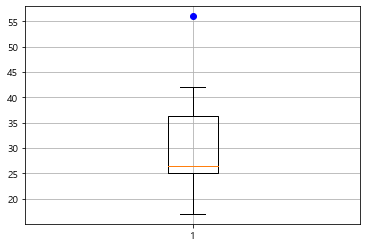

In [22]:
import matplotlib.pyplot as plt

# 한글출력 설정
plt.rcParams['font.family'] = 'Malgun Gothic'# '맑은 고딕'으로 설정
# plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False 

S = [26,31,27,38,42,56,18,17,25,25]

plt.boxplot(S, sym='bo')
# plt.boxplot(S, vert=False)
plt.grid()
plt.show()

- 데이터가 한쪽으로 치우친 것 확인함

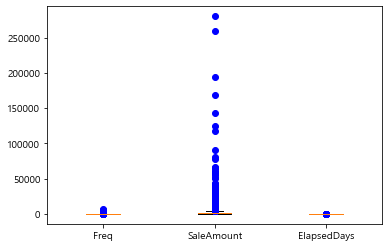

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.boxplot([customer_df.Freq, customer_df.SaleAmount, customer_df.ElapsedDays],
           sym='bo')
plt.xticks([1,2,3], ['Freq','SaleAmount','ElapsedDays'])
plt.show()

--------------------------------

#### #로그함수의 성질
- 로그함수

In [24]:
from matplotlib import font_manager

for i in font_manager.fontManager.ttflist:
    if 'Malgun Gothic' in i.name:
        print(i.name, i.fname)

Malgun Gothic C:\Windows\Fonts\malgun.ttf
Malgun Gothic C:\Windows\Fonts\malgunsl.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf


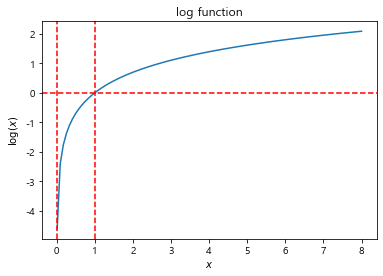

In [25]:
import numpy as np

# 로그함수
xx = np.linspace(0.01, 8, 100)
yy = np.log(xx)
plt.title("log function")
plt.plot(xx, yy)
plt.axhline(0, c='r', ls="--")
plt.axvline(0, c='r', ls="--")
plt.axvline(1, c='r', ls="--")
plt.xlabel("$x$")
plt.ylabel("$\log(x)$")
plt.show()

- 어떤 함수에 로그를 적용해도 함수의 최고점, 최저점의 위치는 변하지 않는다.
 > arg max f(x) = arg max logf(x)

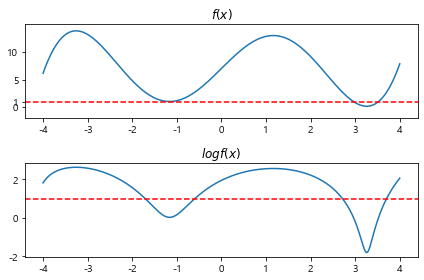

In [26]:
def ff(x):
    return x**3 - 12*x + 20 * np.sin(x) + 7

xx = np.linspace(-4, 4, 300)
yy = ff(xx)

plt.subplot(211)     # 2행 1열 첫번째
plt.plot(xx, yy)
plt.axhline(1, c='r', ls='--')
plt.yticks([0, 1, 5, 10])
plt.ylim(-2, 15)
plt.title('$f(x)$')

plt.subplot(212)     # 2행 1열 두번째
plt.plot(xx, np.log(yy))
plt.axhline(1, c='r', ls='--')
plt.title('$log f(x)$')

plt.tight_layout()
plt.show()

- 로그함수는 0~1사이의 작은 값을 확대시켜 보여준다.

[0.19356424 0.25224431 0.21259213 0.19217803 0.14942128]


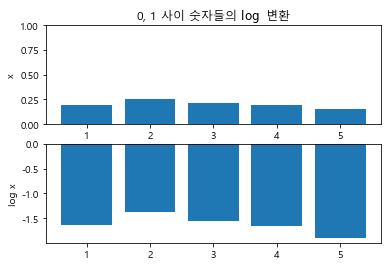

In [27]:
np.random.seed(0)
x = np.random.rand(5)
x = x / x.sum()
print(x)

plt.subplot(211)
plt.title('0, 1 사이 숫자들의 $\log$ 변환')
plt.bar(range(1,6), x)
plt.ylim(0, 1)
plt.ylabel('x')

plt.subplot(212)
plt.bar(range(1,6), np.log(x))
plt.ylabel('log x')

plt.show()

-------------------

- **로그함수를 이용하여 값의 분포를 고르게 조정한다.**
> x가 0의 값을 가지면 무한대가 되므로 이를 해결하기 위한 방법으로 x대신 x+1을 해준다.<br>
> np.log(값) --> np.log(1+값) --> np.log1p() 사용한다

In [28]:
# 로그함수를 이용하여 값의 분포 고르게 조정
import numpy as np

customer_df['SaleAmount_log'] = np.log1p(customer_df.SaleAmount)
customer_df['Freq_log'] = np.log1p(customer_df.Freq)
customer_df['ElapsedDays_log'] = np.log1p(customer_df.ElapsedDays)
customer_df.head(2)

,SaleAmount,Freq,ElapsedDays,SaleAmount_log,Freq_log,ElapsedDays_log
CustomerID,,,,,,
12346,77183.6,1,326,11.253955,0.693147,5.789960
12347,4310.0,182,3,8.368925,5.209486,1.386294


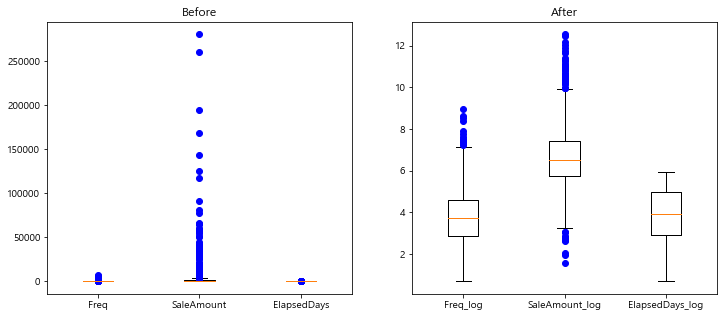

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5)) #그래프 크기(인치)

plt.subplot(121)
plt.boxplot([customer_df.Freq, customer_df.SaleAmount, customer_df.ElapsedDays],
           sym='bo')
plt.xticks([1,2,3], ['Freq','SaleAmount','ElapsedDays'])
plt.title('Before')


# 아웃레이어가 줄고 비교적 균형잡힌 모양이 된다.
plt.subplot(122)
plt.boxplot([customer_df.Freq_log, customer_df.SaleAmount_log, customer_df.ElapsedDays_log],
           sym='bo')
plt.xticks([1,2,3], ['Freq_log','SaleAmount_log','ElapsedDays_log'])
plt.title('After')

plt.show()

---------

---------

### 4. 분석모델(ML모델) 적용 : K-평균 군집화 모델 이용

- **K-Means 알고리즘** : 데이터를 K개의 군집(Cluster)으로 묶는(Clusting) 알고리즘으로 비슷한 특성을 지닌 데이터들끼리 묶어 K개의 군집으로 세분화하는 기법
- **군집(Cluster)** : 비슷한 특성을 지닌 데이터들을 모아놓은 그룹(Group) 
- **평균(mean)** : 군집에 배정할 때 각 군집의 중심점(Centroid)과 데이터들의 평균(mean) 유클리드 거리를 계산하여 가장 가까운 군집에 배정함

#### 4-1. K-Means 알고리즘의 원리
 Step 1). 군집의 개수(K) 설정 <br> 
 Step 2). 초기 중심점 설정 <br>
 Step 3). 데이터를 군집에 할당(배정) <br>
 Step 4). 중심점 재설정(갱신) <br>
 Step 5). 데이터를 군집에 재할당(배정) <br>
 ** Step5->Step4 중심점의 위치가 더 이상 변하지 않을 때까지 5단계에서 다시 4단계로 가면서 반복시행한다.

 Step 1). 군집의 개수(K) 설정
군집의 개수 설정 방법론 
  - 1) Rule of thumnb
  - 2) **Elbow Method**
  - 3) 정보 기준 접근법(Information Criterion Approach)

 Step 2). 초기 중심점 설정
  - 1) Randomly select
  - 2) Manually assign
  - 3) **K-means++**

 Step 3). 데이터를 군집에 할당(배정) <br>
거리 상 가장 가까운 군집(중심점)으로 주어진 모든 데이터를 할당 또는 배정한다

 Step 4). 중심점 재설정(갱신) <br>
모든 주어진 데이터의 군집 배정이 끝나면 군집의 중심점(Centroid)을 그 군집의 속하는 데이터들의 가장 중간(평균)에 위치한 지점으로 재설정한다    

 Step 5). 데이터를 군집에 재할당(배정)<br>
step 3에서 했던 방법과 똑같이 시행하며, 더 이상 중심점의 이동이 없을 때까지 step 4와 step 5를 반복한다.

#### 4-2. scikit-learn K-Means 모델 적용
- **K-means** 군집 알고리즘과 군집 평가지표인 **실루엣 계수**(Silhouette Coefficient) 이용
-  알고리즘 학습에 사용할 **X_features 지정**하기('Freq_log','SaleAmount_log','ElapsedDays_log')
- X_features를 **정규분포로 스케일링**한다.
- 참고: 실루엣 계수 설명(https://studying-haeung.tistory.com/10)

#### 4-2-1.독립변수(X_feature)를 정규 분포로 스케일링하기

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler


X_features = customer_df[['Freq_log','SaleAmount_log','ElapsedDays_log']].values


# 정규분포로 스케일링한다.
X_features_scaled = StandardScaler().fit_transform(X_features)

In [31]:
tmp = pd.DataFrame(X_features_scaled)
tmp
# tmp.info()

,0,1,2
0,-2.438202,3.707716,1.478884
1,1.188986,1.414903,-1.890642
2,-0.211465,0.720024,0.372339
3,0.461819,0.702287,-0.659158
4,-0.673554,-0.614514,1.442954
...,...,...,...
4333,-1.069075,-1.102093,1.357416
4334,-1.324833,-1.735717,1.030534
4335,-0.934910,-1.113332,-1.270148
4336,2.291307,0.822812,-1.719901


#### 4-2-2. 군집의 개수(K) 설정 : 엘보 방법(Elbow Method)
- 클러스터 개수를 1~10까지 변화시키면서 왜곡의 크기 변화를 그래프로 나타내어 엘보 지점 찾는다.
- Cluster 간의 거리의 합을 나타내는 inertia가 급격히 떨어지는 구간이 생기는데 이 지점의 K 값을 군집의 개수로 사용
- inertia_속성으로 확인할 수 있다

In [32]:
#!pip install numpy==1.21.4

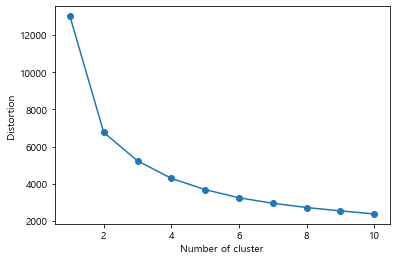

In [33]:
# 만약 kmeans_i.fit()부분에서 numpy 오류가 나면
# numpy 버전을 1.21.4로 설치한다. 

distortions = []  # 왜곡의 크기 값

for i in range(1, 11):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모델 생성
    kmeans_i.fit(X_features_scaled)                 # 모델 훈련
    distortions.append(kmeans_i.inertia_)           # inertia value:군집의 응집도(낮을 수록 응집도 높다)
    
plt.plot(range(1,11), distortions, marker='o')   
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.show()

#### 4-2-3. 군집의 개수(K=3) 설정하여 모델 생성하기

In [36]:
# 모델 생성
k = 3
model = KMeans(n_clusters=k, random_state=0)


# 모델 학습 & 결과 예측(-->클러스터 레이블 생성)
Y_pred = model.fit_predict(X_features_scaled) 

# ClusterdLable 컬럼 신규 생성
customer_df['ClusterdLable'] = Y_pred 
customer_df.head()

,SaleAmount,Freq,ElapsedDays,SaleAmount_log,Freq_log,ElapsedDays_log,ClusterdLable
CustomerID,,,,,,,
12346,77183.60,1,326,11.253955,0.693147,5.789960,2
12347,4310.00,182,3,8.368925,5.209486,1.386294,1
12348,1797.24,31,76,7.494564,3.465736,4.343805,2
12349,1757.55,73,19,7.472245,4.304065,2.995732,2
12350,334.40,17,311,5.815324,2.890372,5.743003,0


### 5. 결과 분석 및 시각화

#### 5-1. 클러스터의 비중가 데이터 분포를 차트로 시각화하기
- 최적의 클러스터 수(K)를 찾기 위해 그래프로 확인한다.

In [37]:
# 실루엣 계수를 구하고 막대 그래프로 시각화하기
from matplotlib import cm

def silhouetteViz(n_cluster, X_features):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features) 
    
    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')
    
    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []
    
    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels==c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes, 
                height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)
        
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title(f'Number of Cluster:{str(n_cluster)}\nSilhouette_Score:{str(round(silhouette_avg,3))}')
    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks([0,0.2,0.4,0.6,0.8,1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    plt.tight_layout()
    plt.show()

In [38]:
# 클러스터에 대한 데이터 분포를 산포도로 시각화하기
def clusterScatter(n_cluster, X_features):
    c_colors = []
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features) 
    
    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster) # 클러스터의 색상 설정(RGB스펙트럼)
        c_colors.append(c_color)
        
        #클러스터의 데이터 분포를 동그라미로 시각화
        plt.scatter(X_features[Y_labels==i, 0], X_features[Y_labels==i, 1],
                   marker='o', color=c_color, edgecolor='black', s=50, 
                   label=f'cluster {str(i)}')
        
    # 각 클러스터의 중심점을 삼각형으로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1],
                   marker='^', color=c_colors[i], edgecolor='w', s=200)

    plt.xlabel('SalesAmount')
    plt.ylabel('Freq')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

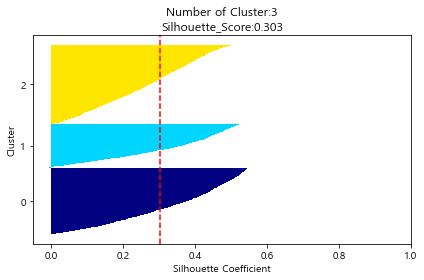

In [41]:
# silhouetteViz()함수 호출하여 클러스터의 비중과 데이터 분포 시각화 하기
# 실루엣 계수가 1에 가까운 것으로 채택한다.
silhouetteViz(3, X_features_scaled)

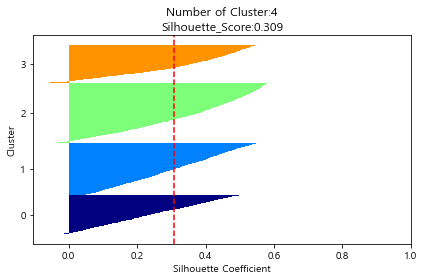

In [42]:
silhouetteViz(4, X_features_scaled)

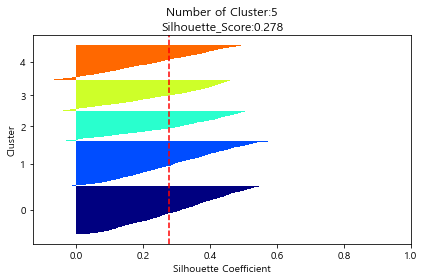

In [43]:
silhouetteViz(5, X_features_scaled)

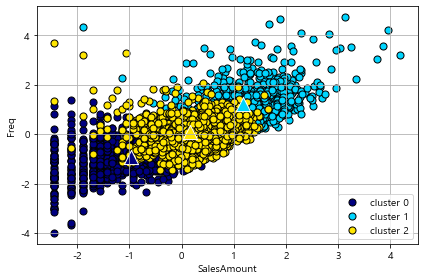

In [35]:
clusterScatter(3, X_features_scaled)

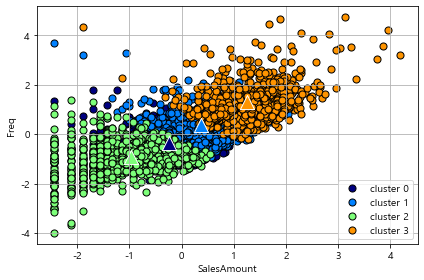

In [36]:
clusterScatter(4, X_features_scaled)

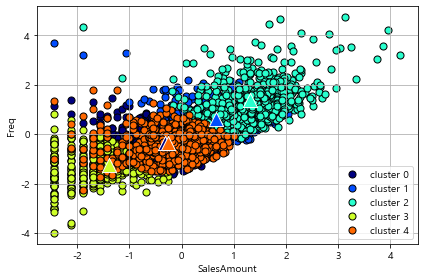

In [37]:
clusterScatter(5, X_features_scaled)

#### 5-2. 최종 클러스터 K=4 반영하여 고객군 파일로 저장하기
- 최적의 클러스터 수(K=4) 모델에 반영하기

In [38]:
# 모델 생성
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
# 모델 학습 & 결과 예측(-->클러스터 레이블 생성)
Y_labels = kmeans.fit_predict(X_features_scaled) 

customer_df['ClusterdLable'] = Y_labels 
customer_df.head()

,SaleAmount,Freq,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterdLable
CustomerID,,,,,,,
12346,77183.60,1,326,0.693147,11.253955,5.789960,1
12347,4310.00,182,3,5.209486,8.368925,1.386294,3
12348,1797.24,31,76,3.465736,7.494564,4.343805,1
12349,1757.55,73,19,4.304065,7.472245,2.995732,1
12350,334.40,17,311,2.890372,5.815324,5.743003,2


- **군집된 결과 파일로 저장하기**

In [39]:
customer_df.to_csv('data/Online_Retail_Clusterd.csv')

- **군집된 고객 그룹 통계 확인하기**

In [40]:
customer_df.reset_index(drop=False, inplace=True)
customer_df.groupby('ClusterdLable')['CustomerID'].count()

ClusterdLable
0     891
1    1207
2    1368
3     872
Name: CustomerID, dtype: int64

----------------------------

## [미션] 게임 고객 군 분류하기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

customer_df = pd.read_csv('data/game_usage.csv')
customer_df

In [ ]:
customer_df.info()

X = customer_df['time spent']
Y = customer_df['game level']

plt.scatter(X, Y)
plt.xlabel('time spent')
plt.ylabel('game level')
plt.show()

#### 독립변수(X_feature)를 정규 분포로 스케일링하기

In [ ]:
# 독립변수(X_feature)를 정규 분포로 스케일링하기
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = customer_df[['time spent','game level']].values

# 정규분포로 스케일링한다.
from sklearn.preprocessing import StandardScaler
X_features_scaled = StandardScaler().fit_transform(X_features)

#### k개수 지정하기 이해 왜곡 곡선 확인하기

In [ ]:
distortions = []  # 왜곡의 크기 값

for i in range(1, 11):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모델 생성
    kmeans_i.fit(X_features_scaled)                 # 모델 훈련
    distortions.append(kmeans_i.inertia_)           # inertia value:군집의 응집도(낮을 수록 응집도 높다)
    
plt.plot(range(1,11), distortions, marker='o')   
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.show()

#### K-mean 군집 모델 생성하기

In [ ]:
# 모델 생성
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
# 모델 학습 & 결과 예측(-->클러스터 레이블 생성)
Y_labels = kmeans.fit_predict(X_features_scaled) 

customer_df['ClusterdLable'] = Y_labels 
customer_df.head()

- **실루엣 계수와 데이터 분포 그래프로 시각화하기**

In [ ]:
silhouetteViz(4, X_features_scaled)

In [ ]:
silhouetteViz(5, X_features_scaled)

In [ ]:
silhouetteViz(6, X_features_scaled)

In [ ]:
silhouetteViz(7, X_features_scaled)

In [ ]:
clusterScatter(5, X_features_scaled)

In [ ]:
clusterScatter(6, X_features_scaled)

- **최적의 K=6 반영하여 고객 군집하기**

In [ ]:
# 모델 생성
k = 6
kmeans = KMeans(n_clusters=k, random_state=0)
# 모델 학습 & 결과 예측(-->클러스터 레이블 생성)
Y_labels = kmeans.fit_predict(X_features_scaled) 

customer_df['ClusterdLable'] = Y_labels 
customer_df

- **군집된 고객 파일로 저장히기**

In [ ]:
customer_df.to_csv('data/game_usage_Clusterd.csv')

- **군집된 고객 그룹 통계 확인하기**

In [ ]:
customer_df.groupby('ClusterdLable').count()